In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, classification_report

In [16]:
# Load CIFAR-10 dataset
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = cifar10.load_data()
class_names_cifar10 = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Load MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
class_names_mnist = [str(i) for i in range(10)]

In [17]:
# Preprocess CIFAR-10 data
x_train_cifar10 = x_train_cifar10.astype('float32') / 255.0
x_test_cifar10 = x_test_cifar10.astype('float32') / 255.0
y_train_cifar10 = to_categorical(y_train_cifar10, 10)
y_test_cifar10 = to_categorical(y_test_cifar10, 10)

# Preprocess MNIST data
x_train_mnist = x_train_mnist.astype('float32') / 255.0
x_test_mnist = x_test_mnist.astype('float32') / 255.0
x_train_mnist = np.expand_dims(x_train_mnist, -1)
x_test_mnist = np.expand_dims(x_test_mnist, -1)
y_train_mnist = to_categorical(y_train_mnist, 10)
y_test_mnist = to_categorical(y_test_mnist, 10)

In [18]:
def create_vgg16_cifar10(input_shape, num_classes):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2), strides=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2), strides=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [20]:
# Data augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(x_train_cifar10)

# Train and evaluate the VGG-16 model on CIFAR-10 dataset
vgg16_cifar10 = create_vgg16_cifar10(x_train_cifar10.shape[1:], 10)
history_cifar10_vgg16 = vgg16_cifar10.fit(datagen.flow(x_train_cifar10, y_train_cifar10, batch_size=64),
                                          epochs=10,
                                          validation_data=(x_test_cifar10, y_test_cifar10),
                                          steps_per_epoch=x_train_cifar10.shape[0] // 64)

Epoch 1/10
  3/781 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.1050 - loss: 2.7124 

W0000 00:00:1717841609.589662     102 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3434 - loss: 1.8412

W0000 00:00:1717841648.731909     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


781/781 ━━━━━━━━━━━━━━━━━━━━ 60s 57ms/step - accuracy: 0.3436 - loss: 1.8405 - val_accuracy: 0.5359 - val_loss: 1.3483
Epoch 2/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.5625 - loss: 1.2904

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5625 - loss: 1.2904 - val_accuracy: 0.5271 - val_loss: 1.3863
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.5684 - loss: 1.2082 - val_accuracy: 0.6436 - val_loss: 1.0079
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6719 - loss: 0.9447 - val_accuracy: 0.6431 - val_loss: 1.0104
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6520 - loss: 0.9942 - val_accuracy: 0.6802 - val_loss: 0.9125
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7344 - loss: 0.8071 - val_accuracy: 0.6751 - val_loss: 0.9290
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.7035 - loss: 0.8581 - val_accuracy: 0.6915 - val_loss: 0.9039
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5781 - loss: 1.0266 - val_accuracy: 0.6961 - val_loss: 0.8908
Epoch 9/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.7491 - loss: 0.7348 - val_accuracy: 0.723

In [10]:
# Define adapted VGG-16 model for MNIST
def create_vgg16_mnist(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
# Train and evaluate the VGG-16 model on MNIST dataset
vgg16_mnist = create_vgg16_mnist(x_train_mnist.shape[1:], 10)
history_mnist_vgg16 = vgg16_mnist.fit(x_train_mnist, y_train_mnist, epochs=10, validation_data=(x_test_mnist, y_test_mnist))

Epoch 1/10
  43/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2294 - loss: 2.0514

W0000 00:00:1717841242.140585     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8933 - loss: 0.3184

W0000 00:00:1717841250.107950     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8934 - loss: 0.3182 - val_accuracy: 0.9872 - val_loss: 0.0440
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9852 - loss: 0.0496 - val_accuracy: 0.9917 - val_loss: 0.0303
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9898 - loss: 0.0373 - val_accuracy: 0.9914 - val_loss: 0.0294
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9908 - loss: 0.0315 - val_accuracy: 0.9871 - val_loss: 0.0522
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9922 - loss: 0.0271 - val_accuracy: 0.9888 - val_loss: 0.0379
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9942 - loss: 0.0226 - val_accuracy: 0.9916 - val_loss: 0.0270
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9937 - loss: 0.0212 - val_accuracy: 0.9923 - val_loss: 0.0296
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9955 - loss: 0.0153 - val_accur

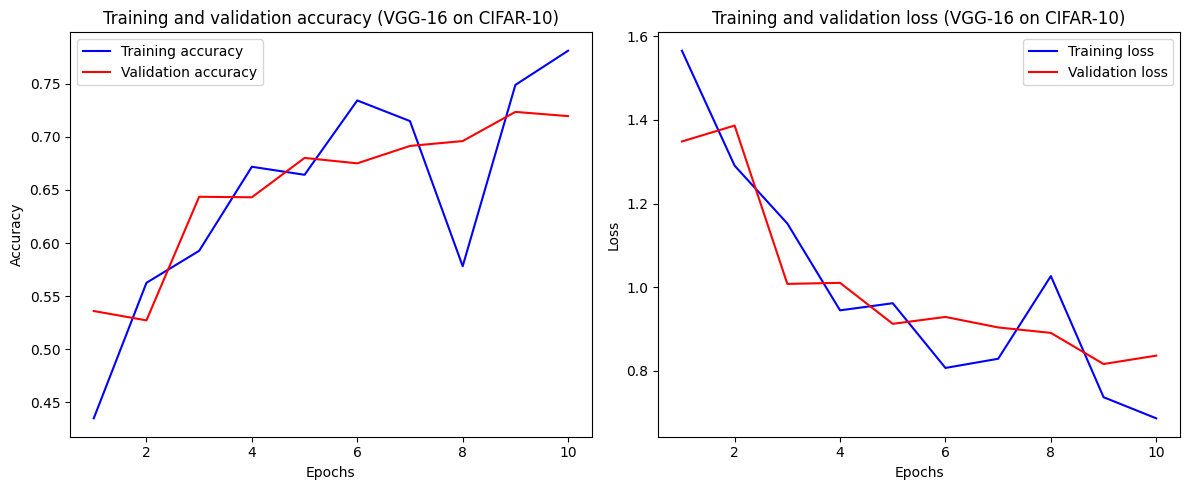

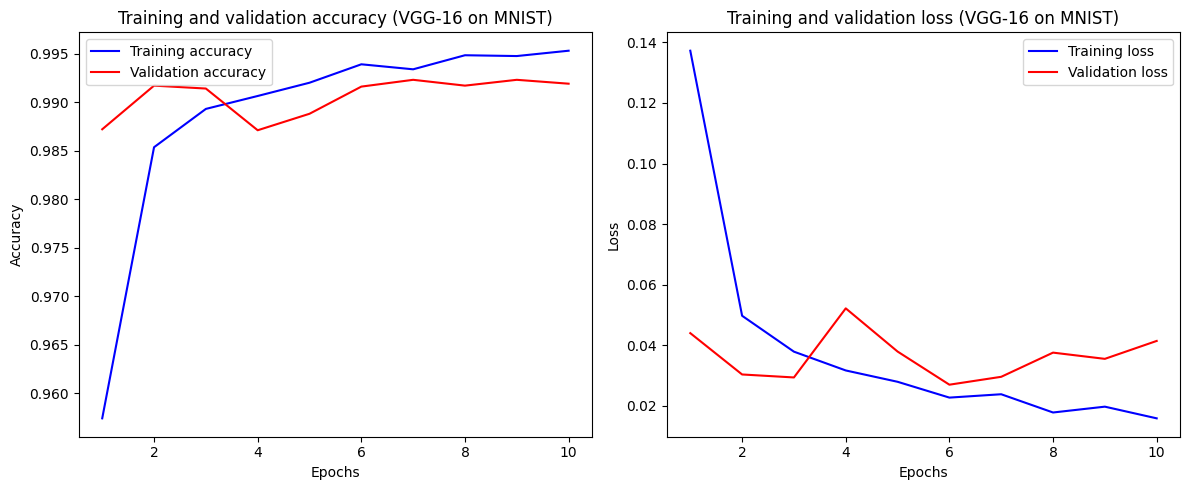

In [21]:
# Plot training history for VGG-16 model
def plot_training_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(f'Training and validation accuracy ({title})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'Training and validation loss ({title})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history_cifar10_vgg16, 'VGG-16 on CIFAR-10')
plot_training_history(history_mnist_vgg16, 'VGG-16 on MNIST')

In [22]:
# Evaluate the VGG-16 model on CIFAR-10 test data
y_pred_cifar10_vgg16 = np.argmax(vgg16_cifar10.predict(x_test_cifar10), axis=-1)
y_true_cifar10_vgg16 = np.argmax(y_test_cifar10, axis=-1)
accuracy_cifar10_vgg16 = accuracy_score(y_true_cifar10_vgg16, y_pred_cifar10_vgg16)
precision_cifar10_vgg16 = precision_score(y_true_cifar10_vgg16, y_pred_cifar10_vgg16, average='weighted')

print("VGG-16 Model Evaluation on CIFAR-10:")
print(f"Accuracy: {accuracy_cifar10_vgg16:.10f}")
print(f"Precision: {precision_cifar10_vgg16:.10f}")
print(classification_report(y_true_cifar10_vgg16, y_pred_cifar10_vgg16, target_names=class_names_cifar10))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
VGG-16 Model Evaluation on CIFAR-10:
Accuracy: 0.7196000000
Precision: 0.7470900339
              precision    recall  f1-score   support

    airplane       0.62      0.80      0.70      1000
  automobile       0.64      0.96      0.77      1000
        bird       0.64      0.65      0.64      1000
         cat       0.52      0.66      0.58      1000
        deer       0.86      0.62      0.72      1000
         dog       0.87      0.43      0.58      1000
        frog       0.79      0.85      0.82      1000
       horse       0.87      0.70      0.77      1000
        ship       0.82      0.85      0.83      1000
       truck       0.83      0.68      0.74      1000

    accuracy                           0.72     10000
   macro avg       0.75      0.72      0.72     10000
weighted avg       0.75      0.72      0.72     10000



In [14]:
# Evaluate the VGG-16 model on MNIST test data
y_pred_mnist_vgg16 = np.argmax(vgg16_mnist.predict(x_test_mnist), axis=-1)
y_true_mnist_vgg16 = np.argmax(y_test_mnist, axis=-1)
accuracy_mnist_vgg16 = accuracy_score(y_true_mnist_vgg16, y_pred_mnist_vgg16)
precision_mnist_vgg16 = precision_score(y_true_mnist_vgg16, y_pred_mnist_vgg16, average='weighted')

print("\nVGG-16 Model Evaluation on MNIST:")
print(f"Accuracy: {accuracy_mnist_vgg16:.10f}")
print(f"Precision: {precision_mnist_vgg16:.10f}")
print(classification_report(y_true_mnist_vgg16, y_pred_mnist_vgg16, target_names=class_names_mnist))

100/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1717841335.483389     102 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

VGG-16 Model Evaluation on MNIST:
Accuracy: 0.9919
Precision: 0.9919
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      1.00      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

